# Name: Jammalamadaka Manasa
# Task-3: Number Recognition

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

In [4]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Training the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2980 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1480 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1098 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0772 - accuracy: 0.9760


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

313/313 - 4s - loss: 0.0702 - accuracy: 0.9778 - 4s/epoch - 11ms/step

Test accuracy: 97.78%


In [8]:
# Make predictions on a sample image
predictions = model.predict(x_test)
sample_image_index = 0  # Change this index to see predictions for different images
predicted_label = np.argmax(predictions[sample_image_index])
true_label = y_test[sample_image_index]

313/313 [==============================] - 1s 2ms/step


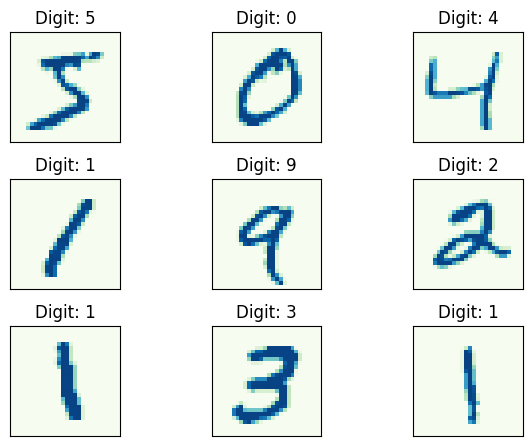

In [9]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='GnBu', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

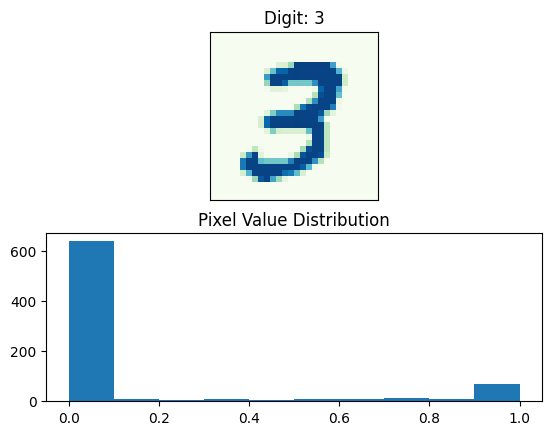

In [10]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[7], cmap='GnBu', interpolation='none')
plt.title("Digit: {}".format(y_train[7]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(28*28))
plt.title("Pixel Value Distribution")